In [1]:
from glob import glob
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from HOTRG import get_lattice_size,get_dist_torus_2D,get_dist_2D
from scipy.optimize import curve_fit,minimize
from correlation_ansatzs import loglog,get_low_temp_correlation_known_m0,critical_correlation,high_temp_correlation


def process_data(data,m0=0,log2Size=30):
    lattice_size=get_lattice_size(nLayers=2*log2Size,spacial_dim=2)
    data['x']=data.apply(lambda row:row['x1']-row['x0'],axis=1)
    data['y']=data.apply(lambda row:row['y1']-row['y0'],axis=1)
    data['dist']=data.apply(lambda row:get_dist_torus_2D(row['x'],row['y'],lattice_size),axis=1)
    data['theta']=data.apply(lambda row:np.arctan2(row['y'],row['x']),axis=1)
    data['correlation_shifted']=data['correlation']-m0**2
    data=data.sort_values(by=['dist'])
    return data

def fitWithHuberLoss(ansatz,x,y,w=None,p0=None,epsilon=1,
                     bounds=None,
                             allow_positive_outliers=True,allow_negative_outliers=True):
    def loss(xs,ys,*p):
        dist=ys-ansatz(xs,*p)
        loss1=1/2 * dist**2 # lsq
        loss2=epsilon*(np.abs(dist)-epsilon/2) # huber
        if allow_positive_outliers:
            loss1[dist>epsilon]=loss2[dist>epsilon]
        if allow_negative_outliers:
            loss1[dist<-epsilon]=loss2[dist<-epsilon]
        return np.sum(loss1*w)
    w=w if w is not None else np.ones_like(x)
    xfit,yfit=x,y
    res=minimize(lambda p: loss(xfit,yfit,*p),p0,method='Nelder-Mead',tol=1e-6,bounds=bounds)
    p=res.x
    return p


def fit_data(ansatz,x,y,w=None,
             huber_epsilon=1e-1,
             x_min=None,x_max=None,
            y_min=None,y_max=None,
            bounds=None,allow_positive_outliers=True,allow_negative_outliers=True,
                use_loglog=True):
    x,y=np.array(x),np.array(y)
    w=np.array(w) if w is not None else np.ones_like(x)
    if x_min is not None:x,y,w=x[x>x_min],y[x>x_min],w[x>x_min]
    if x_max is not None:x,y,w=x[x<x_max],y[x<x_max],w[x<x_max]
    if y_min is not None:x,y,w=x[y>y_min],y[y>y_min],w[y>y_min]
    if y_max is not None:x,y,w=x[y<y_max],y[y<y_max],w[y<y_max]
    
    if use_loglog:
        x,y=x[x>0],y[x>0];x,y=x[y>0],y[y>0]
        print("number of data points:",len(x))
        logx,logy=np.log(x),np.log(y)
        p=tuple(ansatz.p0)
        # p,_=curve_fit(loglog(ansatz),logx,logy,w=w,p0=p,maxfev=10000)
        # print('coarse fitted parameters:',p)
        p=fitWithHuberLoss(loglog(ansatz),logx,logy,w=w,p0=p,epsilon=huber_epsilon,bounds=bounds,
                          allow_positive_outliers=allow_positive_outliers,
                          allow_negative_outliers=allow_negative_outliers)
    else:
        p=tuple(ansatz.p0)
        # p,_=curve_fit(ansatz,x,y,w=w,p0=ansatz.p0,maxfev=10000,bounds=bounds)
        p=fitWithHuberLoss(ansatz,x,y,w=w,p0=p,epsilon=huber_epsilon,bounds=bounds,
                          allow_positive_outliers=allow_positive_outliers,
                          allow_negative_outliers=allow_negative_outliers)
    print('fitted parameters:',p)
    print('fitted equation:',ansatz.eq.format(*p))
    return p,ansatz

[GILT] Warning! float32 is not precise enough, leads to bad RG behavior
[GILT] Warning! float32 is not precise enough, leads to bad RG behavior



# beta: 0.441584
m0: 0.5565094204358001
m0_double: 0.5565094204358
y_min: 1e-05
number of data points: 708


/home/wenhan/jupyter/TRGCFT/correlation_ansatzs.py:10: RuntimeWarning: divide by zero encountered in log
  return np.log(foo(np.exp(logX),*p))


fitted parameters: [4.07954882e-01 6.37054997e+01 2.39154871e-01 7.85319359e-03]
fitted equation: 4.08e-01e^(-x/ζ)/x^(2 Δ),ζ=6.37e+01,Δ=0.2392


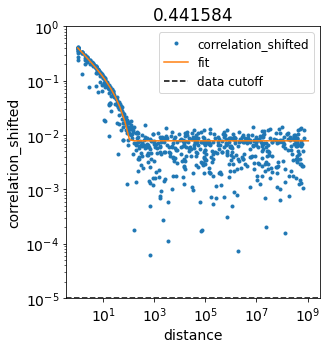


# beta: 0.441484
m0: 0.5475302694327275
m0_double: 0.5475302694327278
y_min: 1e-05
number of data points: 707


/home/wenhan/jupyter/TRGCFT/correlation_ansatzs.py:10: RuntimeWarning: divide by zero encountered in log
  return np.log(foo(np.exp(logX),*p))


fitted parameters: [4.16554942e-01 7.29257965e+01 2.36224196e-01 8.00661260e-03]
fitted equation: 4.17e-01e^(-x/ζ)/x^(2 Δ),ζ=7.29e+01,Δ=0.2362


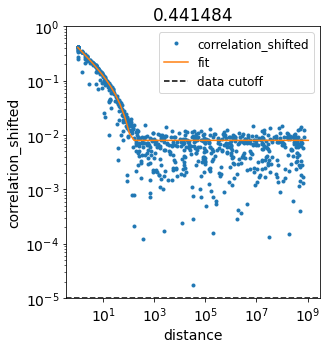


# beta: 0.441384
m0: 0.5370537872172477
m0_double: 0.537053787217248
y_min: 1e-05
number of data points: 705


/tmp/ipykernel_74248/4210735076.py:2: RuntimeWarning: overflow encountered in exp
  return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)


fitted parameters: [4.26702658e-01 8.06062133e+01 2.30651758e-01 8.48015602e-03]
fitted equation: 4.27e-01e^(-x/ζ)/x^(2 Δ),ζ=8.06e+01,Δ=0.2307


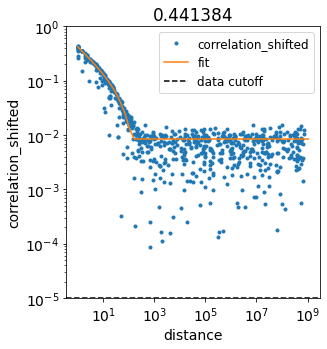


# beta: 0.441284
m0: 0.5274988558121623
m0_double: 0.5274988558121622
y_min: 1e-05
number of data points: 712
fitted parameters: [4.35845230e-01 8.81235645e+01 2.26981673e-01 7.85851055e-03]
fitted equation: 4.36e-01e^(-x/ζ)/x^(2 Δ),ζ=8.81e+01,Δ=0.2270


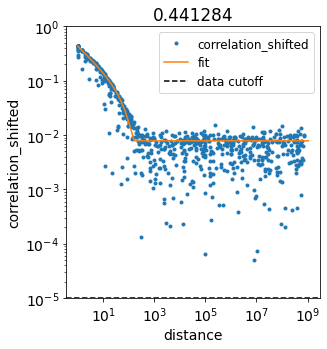


# beta: 0.441184
m0: 0.5165879957494731
m0_double: 0.516587995749473
y_min: 1e-05
number of data points: 713
fitted parameters: [4.46252073e-01 9.38231489e+01 2.21685653e-01 7.35921469e-03]
fitted equation: 4.46e-01e^(-x/ζ)/x^(2 Δ),ζ=9.38e+01,Δ=0.2217


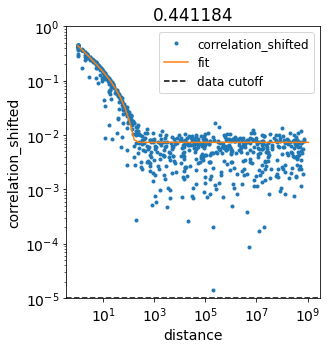


# beta: 0.441084
m0: 0.5013742033363173
m0_double: 0.5013742033363175
y_min: 1e-05
number of data points: 716


/tmp/ipykernel_74248/4210735076.py:2: RuntimeWarning: overflow encountered in exp
  return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)


fitted parameters: [4.60415020e-01 1.12442788e+02 2.16293441e-01 7.54526876e-03]
fitted equation: 4.60e-01e^(-x/ζ)/x^(2 Δ),ζ=1.12e+02,Δ=0.2163


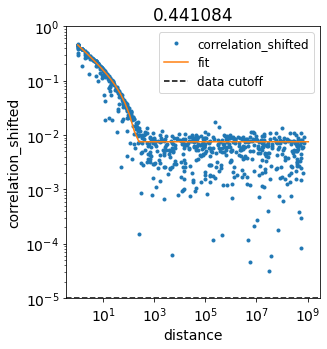


# beta: 0.440984
m0: 0.4830023311445644
m0_double: 0.4830023311445643
y_min: 1e-05
number of data points: 713
fitted parameters: [4.77165265e-01 1.42742742e+02 2.10273031e-01 7.42475675e-03]
fitted equation: 4.77e-01e^(-x/ζ)/x^(2 Δ),ζ=1.43e+02,Δ=0.2103


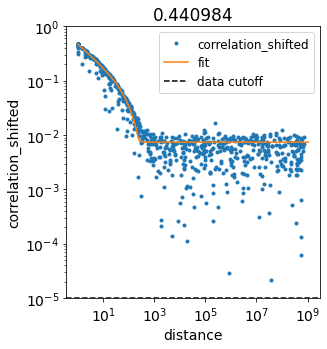


# beta: 0.440884
m0: 0.4590510238163939
m0_double: 0.459051023816394
y_min: 1e-05
number of data points: 722
fitted parameters: [4.98358113e-01 1.90515244e+02 2.02084417e-01 6.83901270e-03]
fitted equation: 4.98e-01e^(-x/ζ)/x^(2 Δ),ζ=1.91e+02,Δ=0.2021


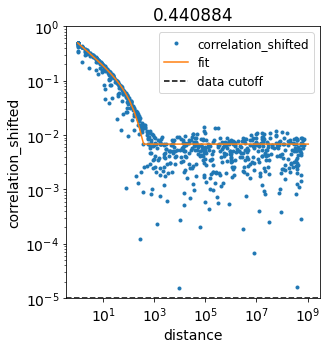


# beta: 0.440784
m0: 0.4202938580627995
m0_double: 0.4202938580627994
y_min: 1e-05
number of data points: 734


/home/wenhan/jupyter/TRGCFT/correlation_ansatzs.py:10: RuntimeWarning: divide by zero encountered in log
  return np.log(foo(np.exp(logX),*p))


fitted parameters: [5.30886097e-01 3.00948487e+02 1.89290068e-01 6.33369099e-03]
fitted equation: 5.31e-01e^(-x/ζ)/x^(2 Δ),ζ=3.01e+02,Δ=0.1893


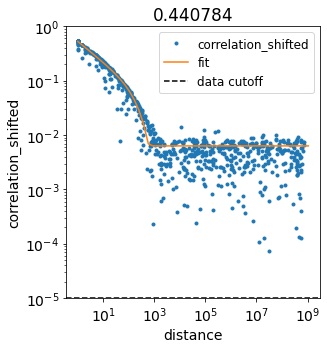


# beta: 0.440774
m0: 0.4138911852945449
m0_double: 0.4138911852945447
y_min: 1e-05
number of data points: 734
fitted parameters: [5.36041245e-01 3.27136848e+02 1.87338462e-01 6.41952850e-03]
fitted equation: 5.36e-01e^(-x/ζ)/x^(2 Δ),ζ=3.27e+02,Δ=0.1873


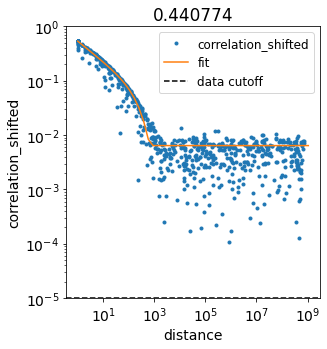


# beta: 0.440764
m0: 0.4076513014400393
m0_double: 0.4076513014400396
y_min: 1e-05
number of data points: 728
fitted parameters: [5.41039368e-01 3.54381088e+02 1.85578577e-01 6.37143212e-03]
fitted equation: 5.41e-01e^(-x/ζ)/x^(2 Δ),ζ=3.54e+02,Δ=0.1856


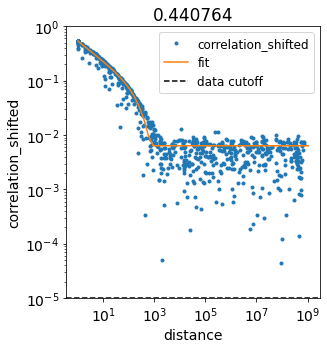


# beta: 0.440754
m0: 0.4019030934220217
m0_double: 0.4019030934220214
y_min: 1e-05
number of data points: 742
fitted parameters: [5.45608808e-01 3.77529943e+02 1.84030023e-01 5.86317531e-03]
fitted equation: 5.46e-01e^(-x/ζ)/x^(2 Δ),ζ=3.78e+02,Δ=0.1840


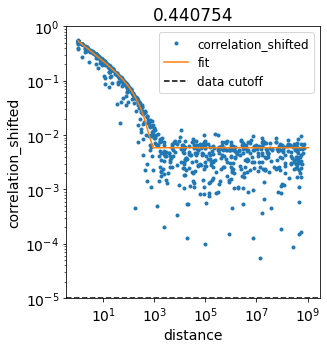


# beta: 0.440744
m0: 0.3944497206445085
m0_double: 0.3944497206445087
y_min: 1e-05
number of data points: 746
fitted parameters: [5.51377992e-01 4.08178028e+02 1.81795980e-01 5.68233584e-03]
fitted equation: 5.51e-01e^(-x/ζ)/x^(2 Δ),ζ=4.08e+02,Δ=0.1818


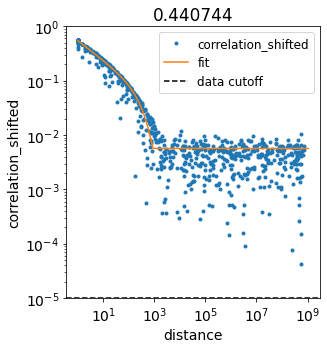


# beta: 0.440734
m0: 0.3848431522087078
m0_double: 0.384843152208708
y_min: 1e-05
number of data points: 748
fitted parameters: [5.58834760e-01 4.72397989e+02 1.79655628e-01 5.67957218e-03]
fitted equation: 5.59e-01e^(-x/ζ)/x^(2 Δ),ζ=4.72e+02,Δ=0.1797


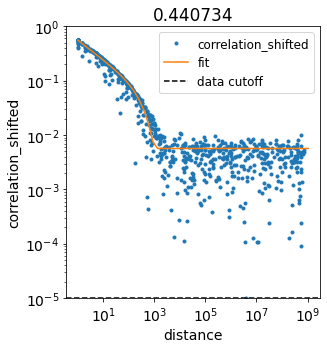


# beta: 0.440724
m0: 0.3732600293153755
m0_double: 0.3732600293153758
y_min: 1e-05
number of data points: 756
fitted parameters: [5.67568887e-01 5.72068149e+02 1.77095492e-01 5.69838168e-03]
fitted equation: 5.68e-01e^(-x/ζ)/x^(2 Δ),ζ=5.72e+02,Δ=0.1771


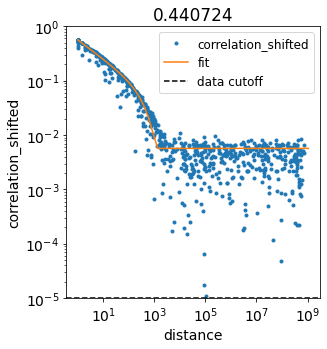


# beta: 0.440714
m0: 0.3612196232021398
m0_double: 0.3612196232021396
y_min: 1e-05
number of data points: 757
fitted parameters: [5.76358468e-01 6.90152651e+02 1.74462386e-01 5.13932857e-03]
fitted equation: 5.76e-01e^(-x/ζ)/x^(2 Δ),ζ=6.90e+02,Δ=0.1745


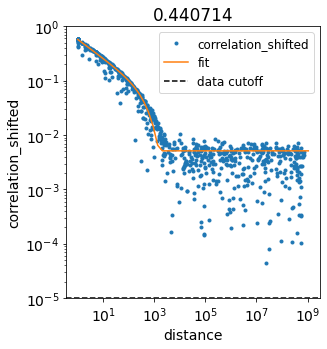


# beta: 0.440704
m0: 0.3418511333986993
m0_double: 0.341851133398699
y_min: 1e-05
number of data points: 760
fitted parameters: [5.90141802e-01 1.01060150e+03 1.70922733e-01 5.08960741e-03]
fitted equation: 5.90e-01e^(-x/ζ)/x^(2 Δ),ζ=1.01e+03,Δ=0.1709


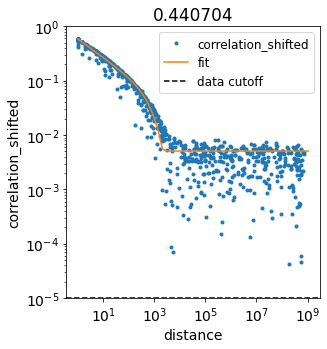


# beta: 0.440694
m0: 0.3132449123964157
m0_double: 0.3132449123964155
y_min: 1e-05
number of data points: 767
fitted parameters: [6.08791757e-01 1.67560895e+03 1.64586771e-01 4.63157223e-03]
fitted equation: 6.09e-01e^(-x/ζ)/x^(2 Δ),ζ=1.68e+03,Δ=0.1646


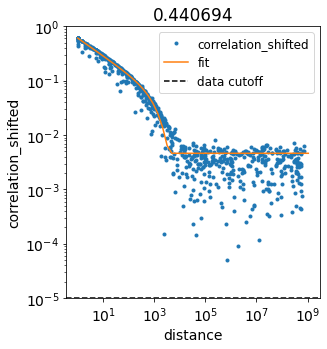


# beta: 0.440693
m0: 0.3098025512168798
m0_double: 0.3098025512168797
y_min: 1e-05
number of data points: 770
fitted parameters: [6.10964397e-01 1.80394362e+03 1.63947214e-01 4.41970243e-03]
fitted equation: 6.11e-01e^(-x/ζ)/x^(2 Δ),ζ=1.80e+03,Δ=0.1639


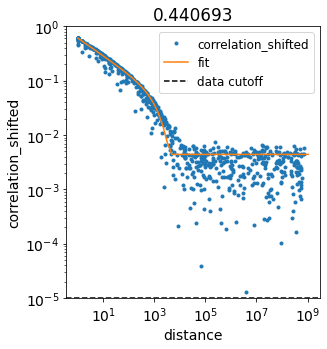


# beta: 0.440692
m0: 0.3057768975792354
m0_double: 0.3057768975792354
y_min: 1e-05
number of data points: 768
fitted parameters: [6.13516595e-01 1.96612498e+03 1.63246612e-01 4.20096134e-03]
fitted equation: 6.14e-01e^(-x/ζ)/x^(2 Δ),ζ=1.97e+03,Δ=0.1632


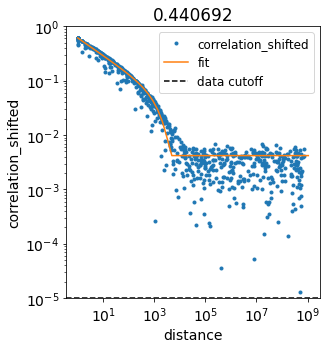


# beta: 0.440691
m0: 0.3007438167985496
m0_double: 0.3007438167985492
y_min: 1e-05
number of data points: 769
fitted parameters: [6.16510531e-01 2.11433014e+03 1.62049345e-01 4.23186575e-03]
fitted equation: 6.17e-01e^(-x/ζ)/x^(2 Δ),ζ=2.11e+03,Δ=0.1620


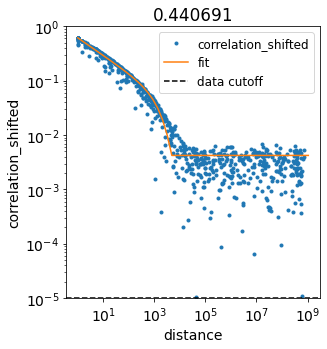


# beta: 0.44069
m0: 0.2945708071765459
m0_double: 0.294570807176546
y_min: 1e-05
number of data points: 773
fitted parameters: [6.20261335e-01 2.41694538e+03 1.60929464e-01 4.17133766e-03]
fitted equation: 6.20e-01e^(-x/ζ)/x^(2 Δ),ζ=2.42e+03,Δ=0.1609


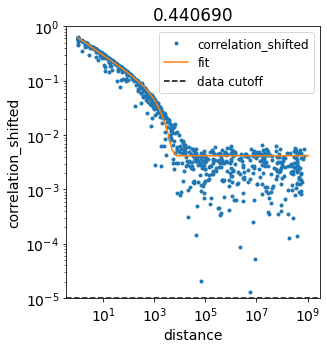


# beta: 0.440689
m0: 0.2873395985599555
m0_double: 0.2873395985599556
y_min: 1e-05
number of data points: 776
fitted parameters: [6.24425221e-01 2.73225102e+03 1.59364037e-01 4.13127234e-03]
fitted equation: 6.24e-01e^(-x/ζ)/x^(2 Δ),ζ=2.73e+03,Δ=0.1594


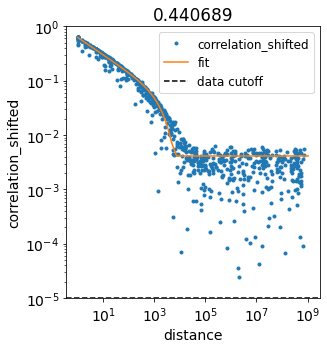


# beta: 0.440688
m0: 0.2806463072278354
m0_double: 0.2806463072278355
y_min: 1e-05
number of data points: 781
fitted parameters: [6.28159504e-01 3.01570365e+03 1.57905650e-01 3.87833801e-03]
fitted equation: 6.28e-01e^(-x/ζ)/x^(2 Δ),ζ=3.02e+03,Δ=0.1579


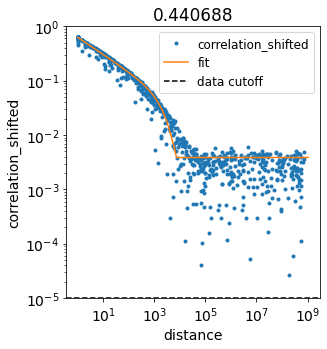


# beta: 0.440687
m0: 0.2707767983360147
m0_double: 0.2707767983360144
y_min: 1e-05
number of data points: 777
fitted parameters: [6.33572352e-01 3.61230957e+03 1.55941120e-01 3.83556258e-03]
fitted equation: 6.34e-01e^(-x/ζ)/x^(2 Δ),ζ=3.61e+03,Δ=0.1559


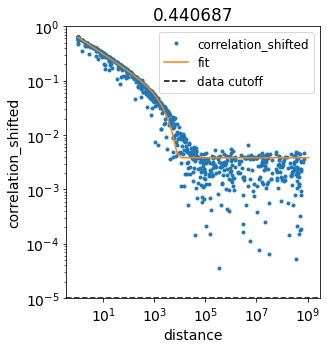


# beta: 0.440686
m0: 0.2342915986695959
m0_double: 0.2581689157150421
y_min: 1e-05
number of data points: 784
fitted parameters: [6.40099283e-01 4.52268075e+03 1.53383524e-01 3.86178109e-03]
fitted equation: 6.40e-01e^(-x/ζ)/x^(2 Δ),ζ=4.52e+03,Δ=0.1534


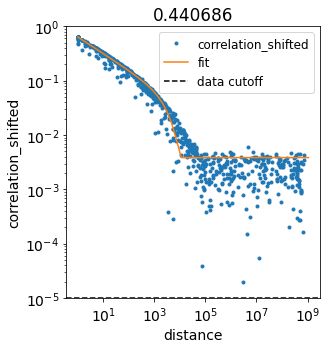


# beta: 0.440685
m0: 0.2383617657318912
m0_double: 0.2383617657318912
y_min: 1e-05
number of data points: 798
fitted parameters: [6.50224367e-01 7.61436169e+03 1.50362430e-01 3.68118984e-03]
fitted equation: 6.50e-01e^(-x/ζ)/x^(2 Δ),ζ=7.61e+03,Δ=0.1504


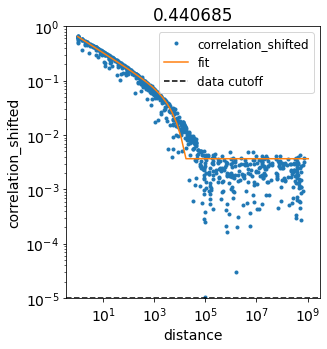


# beta: 0.440684
m0: 0.1878725947496339
m0_double: 0.1878725947496339
y_min: 1e-05
number of data points: 833


/home/wenhan/jupyter/TRGCFT/correlation_ansatzs.py:10: RuntimeWarning: divide by zero encountered in log
  return np.log(foo(np.exp(logX),*p))


fitted parameters: [6.72612393e-01 5.26675360e+04 1.43841243e-01 2.38282259e-03]
fitted equation: 6.73e-01e^(-x/ζ)/x^(2 Δ),ζ=5.27e+04,Δ=0.1438


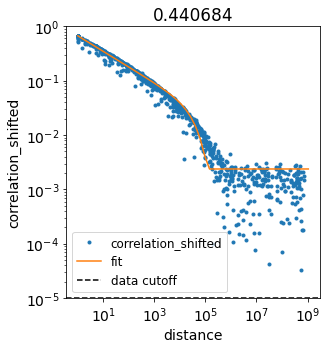


# beta: 0.440683
m0: 4.1319137205801823e-08
m0_double: 4.131913720580182e-08
y_min: 1e-05
number of data points: 659
fitted parameters: [7.01778010e-01 1.99802776e+05 1.28418178e-01 1.32581381e-15]
fitted equation: 7.02e-01e^(-x/ζ)/x^(2 Δ),ζ=2.00e+05,Δ=0.1284


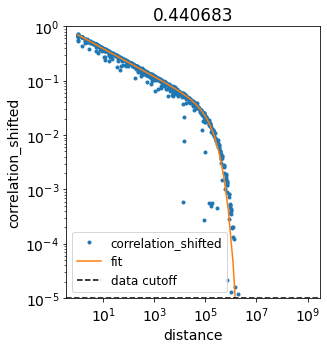


# beta: 0.440682
m0: 3.9430579260525403e-08
m0_double: 3.943057926052539e-08
y_min: 1e-05
number of data points: 625
fitted parameters: [ 7.02049571e-01  9.21220784e+04  1.28672167e-01 -8.46224951e-15]
fitted equation: 7.02e-01e^(-x/ζ)/x^(2 Δ),ζ=9.21e+04,Δ=0.1287


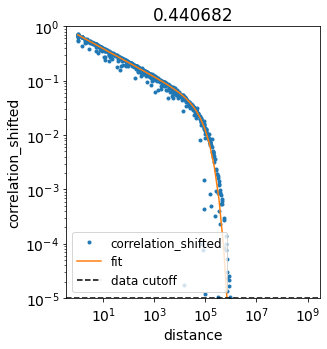


# beta: 0.440681
m0: 1.3773783751689961e-08
m0_double: 1.3773783751689956e-08
y_min: 1e-05
number of data points: 600
fitted parameters: [ 7.02195503e-01  5.93216349e+04  1.28836114e-01 -5.01975225e-16]
fitted equation: 7.02e-01e^(-x/ζ)/x^(2 Δ),ζ=5.93e+04,Δ=0.1288


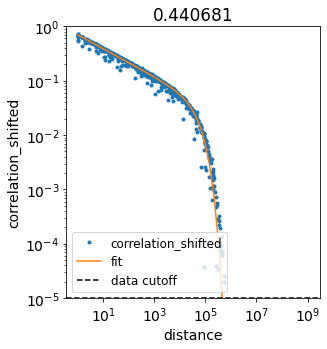


# beta: 0.44068
m0: 1.4672058772212965e-08
m0_double: 1.467205877221296e-08
y_min: 1e-05
number of data points: 587
fitted parameters: [ 7.02277924e-01  4.41140508e+04  1.28949484e-01 -4.04385089e-16]
fitted equation: 7.02e-01e^(-x/ζ)/x^(2 Δ),ζ=4.41e+04,Δ=0.1289


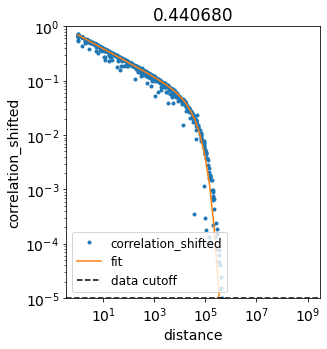


# beta: 0.440679
m0: 2.5909932219924647e-08
m0_double: 2.5909932219924647e-08
y_min: 1e-05
number of data points: 569
fitted parameters: [ 7.02222764e-01  3.44906271e+04  1.28977674e-01 -1.08292802e-15]
fitted equation: 7.02e-01e^(-x/ζ)/x^(2 Δ),ζ=3.45e+04,Δ=0.1290


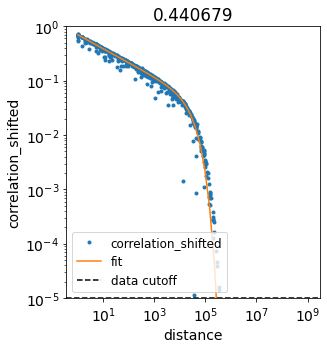


# beta: 0.440678
m0: 8.089543826777415e-09
m0_double: 8.089543826777416e-09
y_min: 1e-05
number of data points: 564
fitted parameters: [ 7.02250149e-01  2.85295070e+04  1.29051978e-01 -9.58887210e-17]
fitted equation: 7.02e-01e^(-x/ζ)/x^(2 Δ),ζ=2.85e+04,Δ=0.1291


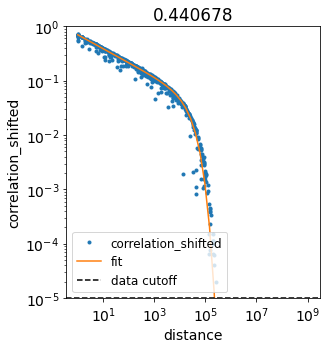


# beta: 0.440677
m0: 9.128560934359393e-09
m0_double: 9.128560934359386e-09
y_min: 1e-05
number of data points: 560
fitted parameters: [ 7.02301156e-01  2.45283614e+04  1.29133749e-01 -1.01726078e-16]
fitted equation: 7.02e-01e^(-x/ζ)/x^(2 Δ),ζ=2.45e+04,Δ=0.1291


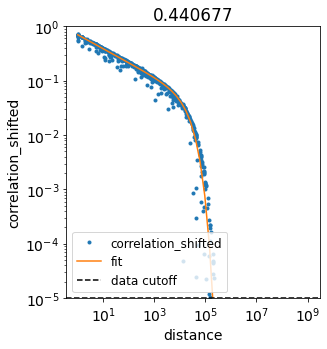


# beta: 0.440676
m0: 5.621924589088951e-09
m0_double: 5.621924589088948e-09
y_min: 1e-05
number of data points: 552
fitted parameters: [ 7.02336241e-01  2.14540581e+04  1.29202122e-01 -3.25281211e-17]
fitted equation: 7.02e-01e^(-x/ζ)/x^(2 Δ),ζ=2.15e+04,Δ=0.1292


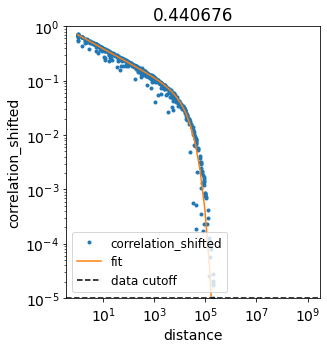


# beta: 0.440675
m0: 6.715113721868153e-11
m0_double: 6.715113721868153e-11
y_min: 1e-05
number of data points: 545
fitted parameters: [ 7.02328367e-01  1.88515522e+04  1.29239289e-01 -3.70251174e-21]
fitted equation: 7.02e-01e^(-x/ζ)/x^(2 Δ),ζ=1.89e+04,Δ=0.1292


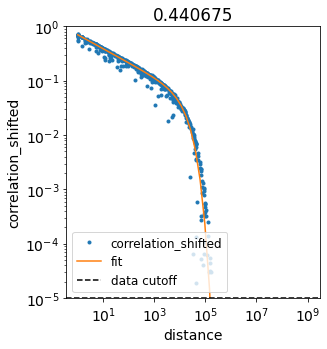


# beta: 0.440674
m0: 5.5925751314934206e-09
m0_double: 5.592575131493418e-09
y_min: 1e-05
number of data points: 535
fitted parameters: [ 7.02319410e-01  1.67803607e+04  1.29274299e-01 -3.70481534e-17]
fitted equation: 7.02e-01e^(-x/ζ)/x^(2 Δ),ζ=1.68e+04,Δ=0.1293


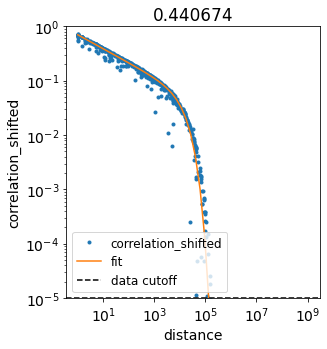


# beta: 0.440664
m0: 1.8045882485865927e-09
m0_double: 1.8045882485865923e-09
y_min: 1e-05
number of data points: 501
fitted parameters: [ 7.02109617e-01  8.06295655e+03  1.29491791e-01 -7.44685630e-19]
fitted equation: 7.02e-01e^(-x/ζ)/x^(2 Δ),ζ=8.06e+03,Δ=0.1295


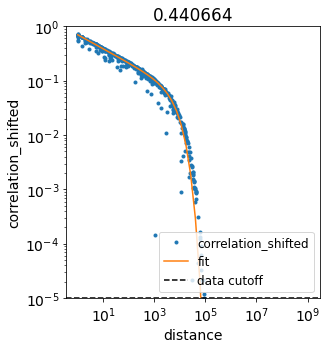


# beta: 0.440654
m0: 2.093466162550418e-09
m0_double: 2.0934661625504188e-09
y_min: 1e-05
number of data points: 481
fitted parameters: [ 7.02070947e-01  5.45256190e+03  1.29785638e-01 -7.90840453e-19]
fitted equation: 7.02e-01e^(-x/ζ)/x^(2 Δ),ζ=5.45e+03,Δ=0.1298


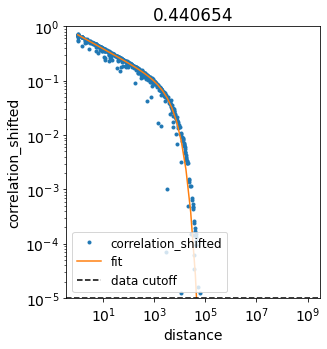


# beta: 0.440644
m0: 1.2303804100074443e-10
m0_double: 1.2303804100074438e-10
y_min: 1e-05
number of data points: 464
fitted parameters: [7.02152882e-01 4.16837783e+03 1.30147142e-01 7.05899662e-22]
fitted equation: 7.02e-01e^(-x/ζ)/x^(2 Δ),ζ=4.17e+03,Δ=0.1301


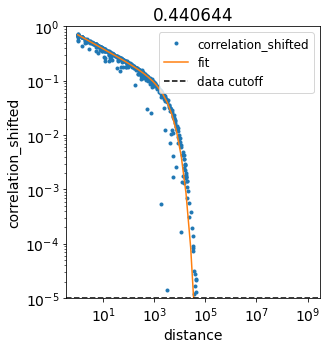


# beta: 0.440634
m0: 2.505015484940173e-10
m0_double: 2.5050154849401744e-10
y_min: 1e-05
number of data points: 452
fitted parameters: [ 7.02106422e-01  3.35675201e+03  1.30390997e-01 -2.53675011e-20]
fitted equation: 7.02e-01e^(-x/ζ)/x^(2 Δ),ζ=3.36e+03,Δ=0.1304


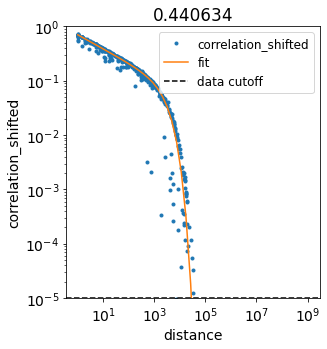


# beta: 0.440624
m0: 4.6408032054694924e-10
m0_double: 4.6408032054694913e-10
y_min: 1e-05
number of data points: 438
fitted parameters: [7.02141438e-01 2.84105562e+03 1.30681482e-01 7.88793332e-21]
fitted equation: 7.02e-01e^(-x/ζ)/x^(2 Δ),ζ=2.84e+03,Δ=0.1307


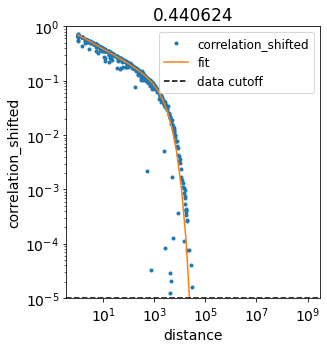


# beta: 0.440614
m0: 1.3114321510677707e-10
m0_double: 1.3114321510677707e-10
y_min: 1e-05
number of data points: 431
fitted parameters: [ 7.02141940e-01  2.45701964e+03  1.30929529e-01 -5.40382549e-21]
fitted equation: 7.02e-01e^(-x/ζ)/x^(2 Δ),ζ=2.46e+03,Δ=0.1309


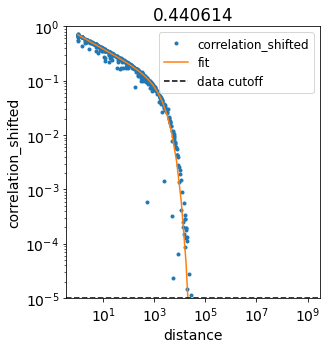


# beta: 0.440604
m0: 7.754759934181513e-11
m0_double: 7.754759934181517e-11
y_min: 1e-05
number of data points: 420
fitted parameters: [7.02162494e-01 2.16303945e+03 1.31193987e-01 2.26523328e-22]
fitted equation: 7.02e-01e^(-x/ζ)/x^(2 Δ),ζ=2.16e+03,Δ=0.1312


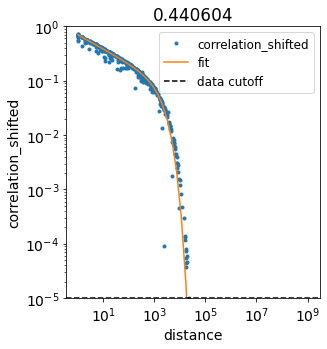


# beta: 0.440594
m0: 4.5829133870559316e-11
m0_double: 4.5829133870559316e-11
y_min: 1e-05
number of data points: 419
fitted parameters: [7.02165087e-01 1.93030287e+03 1.31430360e-01 1.87279916e-22]
fitted equation: 7.02e-01e^(-x/ζ)/x^(2 Δ),ζ=1.93e+03,Δ=0.1314


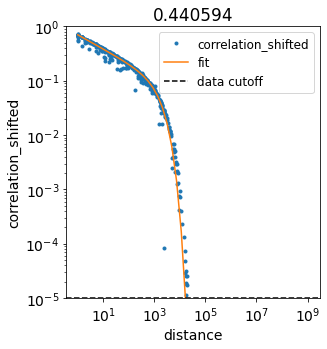


# beta: 0.440574
m0: 1.0332473024940058e-10
m0_double: 1.0332473024940059e-10
y_min: 1e-05
number of data points: 407
fitted parameters: [7.02158386e-01 1.60385933e+03 1.31857465e-01 1.01194530e-21]
fitted equation: 7.02e-01e^(-x/ζ)/x^(2 Δ),ζ=1.60e+03,Δ=0.1319


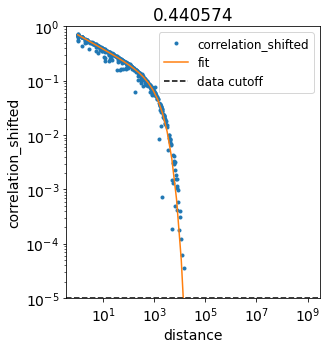


# beta: 0.440474
m0: 4.549912402803097e-11
m0_double: 4.5499124028030976e-11
y_min: 1e-05
number of data points: 385
fitted parameters: [7.01820511e-01 8.60722176e+02 1.33315041e-01 9.98936416e-23]
fitted equation: 7.02e-01e^(-x/ζ)/x^(2 Δ),ζ=8.61e+02,Δ=0.1333


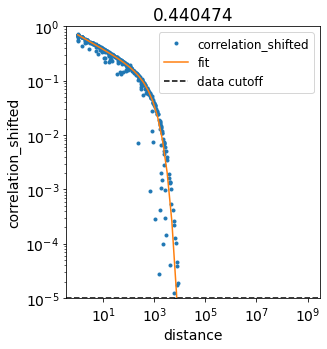


# beta: 0.440374
m0: 6.247632792351351e-13
m0_double: 6.24763279235135e-13
y_min: 1e-05
number of data points: 366
fitted parameters: [7.01530086e-01 5.95580672e+02 1.34539018e-01 4.09009221e-26]
fitted equation: 7.02e-01e^(-x/ζ)/x^(2 Δ),ζ=5.96e+02,Δ=0.1345


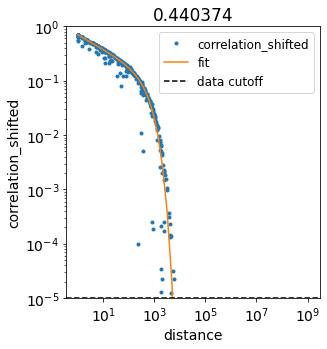


# beta: 0.440274
m0: 4.343672958568601e-12
m0_double: 4.343672958568603e-12
y_min: 1e-05
number of data points: 357
fitted parameters: [7.01034694e-01 4.52176997e+02 1.35275520e-01 2.31706268e-24]
fitted equation: 7.01e-01e^(-x/ζ)/x^(2 Δ),ζ=4.52e+02,Δ=0.1353


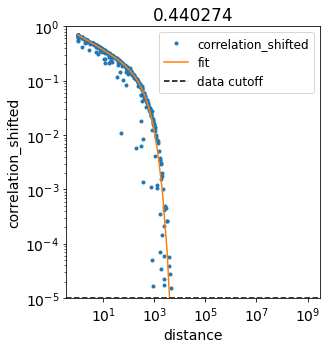


# beta: 0.440174
m0: 1.1742424195542679e-11
m0_double: 1.1742424195542682e-11
y_min: 1e-05
number of data points: 343
fitted parameters: [7.00659224e-01 3.70683275e+02 1.36137231e-01 1.21052534e-23]
fitted equation: 7.01e-01e^(-x/ζ)/x^(2 Δ),ζ=3.71e+02,Δ=0.1361


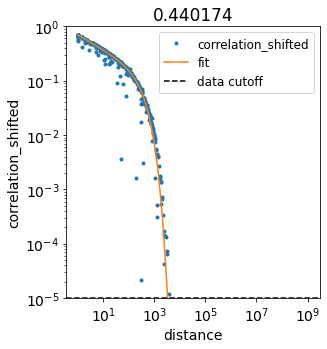


# beta: 0.440074
m0: 4.859659603591233e-12
m0_double: 4.859659603591233e-12
y_min: 1e-05
number of data points: 332
fitted parameters: [7.00222138e-01 3.10630096e+02 1.36732648e-01 2.14303775e-24]
fitted equation: 7.00e-01e^(-x/ζ)/x^(2 Δ),ζ=3.11e+02,Δ=0.1367


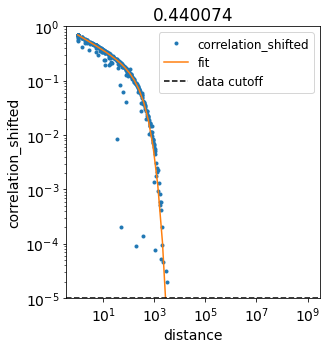


# beta: 0.439974
m0: 4.709046389789853e-12
m0_double: 4.709046389789855e-12
y_min: 1e-05
number of data points: 330
fitted parameters: [6.99656068e-01 2.65375067e+02 1.37073318e-01 8.61149116e-25]
fitted equation: 7.00e-01e^(-x/ζ)/x^(2 Δ),ζ=2.65e+02,Δ=0.1371


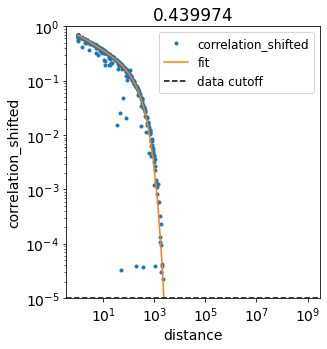


# beta: 0.439874
m0: 3.559486741246786e-12
m0_double: 3.559486741246787e-12
y_min: 1e-05
number of data points: 320
fitted parameters: [6.99163145e-01 2.33644577e+02 1.37460301e-01 2.21658402e-24]
fitted equation: 6.99e-01e^(-x/ζ)/x^(2 Δ),ζ=2.34e+02,Δ=0.1375


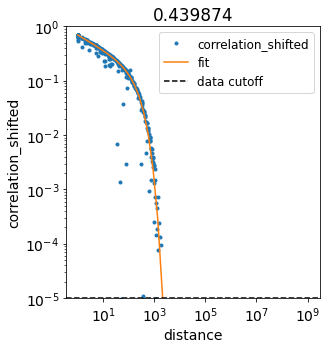


# beta: 0.439774
m0: 1.583913557379739e-12
m0_double: 1.5839135573797384e-12
y_min: 1e-05
number of data points: 317
fitted parameters: [6.98766313e-01 2.09988934e+02 1.37985523e-01 2.79507597e-25]
fitted equation: 6.99e-01e^(-x/ζ)/x^(2 Δ),ζ=2.10e+02,Δ=0.1380


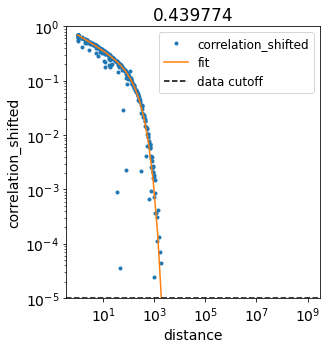

file saved to ./data/hotrg_gilt_X24_betas/fit_results.csv


In [9]:
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)
high_temp_correlation_with_noice.eq='{0:.2e}e^(-x/ζ)/x^(2 Δ),ζ={1:.2e},Δ={2:.4f}'
high_temp_correlation_with_noice.p0=(1,100,0.1,0.01)


names=sorted([os.path.basename(x)[0:-4] for x in glob('./data/hotrg_gilt_X24_betas/*.pth')])
names=[x for x in names if x.replace('.','').replace('-','').isdigit()]
names=names[::-1]
betas=[float(x) for x in names]

data=[]
for beta,name in list(zip(betas,names)):
    print("\n# beta:",beta)
    if not os.path.exists('./data/hotrg_gilt_X24_betas/'+name+'_observables.csv')\
        or not os.path.exists('./data/hotrg_gilt_X24_betas/'+name+'_correlation.pkl'):
        continue

    data_obs=pd.read_csv('./data/hotrg_gilt_X24_betas/'+name+'_observables.csv')
    m0=np.abs(data_obs['magnetization'].iloc[-1])
    m0_double=data_obs['magnetization_double'].iloc[-1]

    data_corr=pd.read_pickle('./data/hotrg_gilt_X24_betas/'+name+'_correlation.pkl')
    if os.path.exists('./data/hotrg_gilt_X24_betas/'+name+'_correlation_appended.pkl'):
        data_corr=pd.concat([data_corr,pd.read_pickle('./data/hotrg_gilt_X24_betas/'+name+'_correlation_appended.pkl')])
    data_corr=process_data(data_corr,m0=m0_double)

    high_temp_correlation_with_noice.p0=(5e-1,1e3,.2,.1*m0_double**2)
    y_min=1e-5
    x_max=np.inf
    huber_epsilon=1e-2
    print('m0:',m0)
    print('m0_double:',m0_double)
    print('y_min:',y_min)
    p,ansatz=fit_data(high_temp_correlation_with_noice,
                      data_corr['dist'],data_corr['correlation_shifted'],
                      w=np.abs(data_corr['correlation_shifted']),
                        y_min=y_min,x_max=x_max,huber_epsilon=huber_epsilon)
    
    # zeta=p[1]
    # x_max_UV=zeta/3
    # p_UV,ansatz_UV=fit_data(data_corr['dist'],data_corr['correlation'],critical_correlation,
    #                     y_min=y_min,use_loglog=True,x_max=x_max_UV)

    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.plot(data_corr['dist'],data_corr['correlation_shifted'],'.',label='correlation_shifted')
    r=np.geomspace(1,2**30)
    plt.plot(r,ansatz(r,*p),'-',label='fit')
    plt.axhline(y_min,color='k',ls='--',label='data cutoff')
    plt.axvline(x_max,color='k',ls='--')
    plt.yscale('log');plt.xscale('log');plt.ylim(1e-5,1e0)
    plt.title(name);plt.xlabel('distance');plt.ylabel('correlation_shifted')
    plt.legend()

    # plt.subplot(122)
    # plt.plot(data_corr['dist'],np.abs(data_corr['correlation']),'.',label='correlation')
    # r=np.geomspace(1,x_max_UV)
    # plt.plot(r,np.abs(ansatz_UV(r,*p_UV)),'-',label='fit')
    # plt.axhline(y_min,color='k',ls='--',label='data cutoff')
    # plt.axvline(x_max_UV,color='k',ls='--')
    # plt.yscale('log');plt.xscale('log');plt.ylim(1e-5,1e0)
    # plt.title(name);plt.xlabel('distance');plt.ylabel('correlation')
    # plt.legend()
    plt.show()

    data.append({
        'beta':beta,
        'm0':m0,
        'm0_double':m0_double,
        'A':p[0],
        'zeta':p[1],
        'delta':p[2],
        # 'A_UV':p_UV[0],
        # 'delta_UV':p_UV[1],
    })
data=pd.DataFrame(data)
    
data.to_csv('./data/hotrg_gilt_X24_betas/fit_results.csv',index=False)
print('file saved to ./data/hotrg_gilt_X24_betas/fit_results.csv')

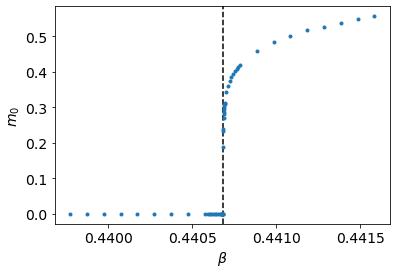

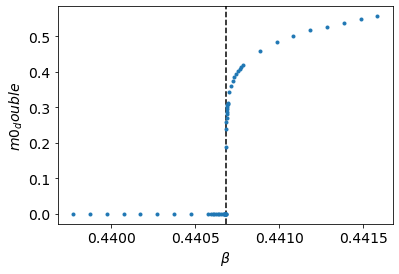

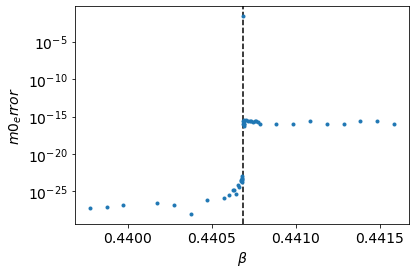

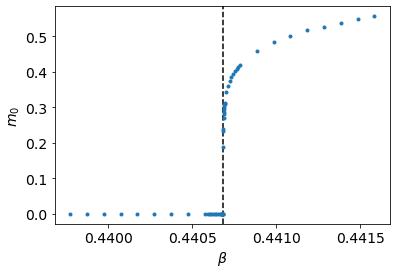


# High temperature
number of data points: 27
fitted parameters: [ 1.80294383e-16 -1.56207907e+00]
fitted equation: A τ^k,A=1.80e-16,k=-1.5621

# Low temperature
number of data points: 28
fitted parameters: [1.24304599 0.12945951]
fitted equation: A τ^k,A=1.24e+00,k=0.1295


/home/wenhan/jupyter/TRGCFT/correlation_ansatzs.py:10: RuntimeWarning: invalid value encountered in log
  return np.log(foo(np.exp(logX),*p))


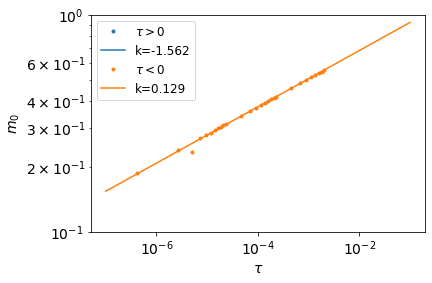

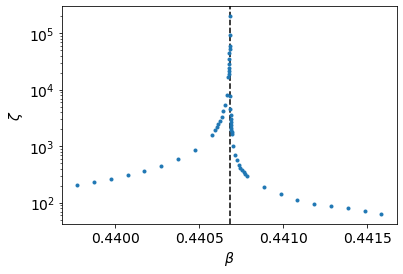


# High temperature
number of data points: 27
fitted parameters: [ 0.48855878 -0.9765767 ]
fitted equation: A τ^k,A=4.89e-01,k=-0.9766

# Low temperature
number of data points: 28
fitted parameters: [ 0.70389111 -0.72488175]
fitted equation: A τ^k,A=7.04e-01,k=-0.7249


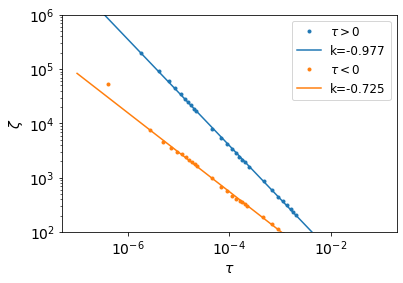

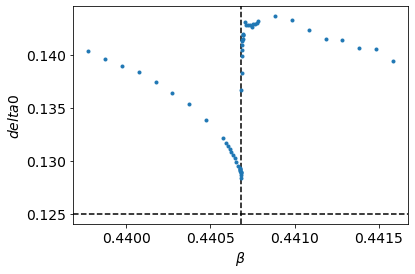


# High temperature
number of data points: 27
fitted parameters: [0.0562989 0.2358073]
fitted equation: A τ^k,A=5.63e-02,k=0.2358

# Low temperature
number of data points: 28
fitted parameters: [0.0199116  0.01817907]
fitted equation: A τ^k,A=1.99e-02,k=0.0182


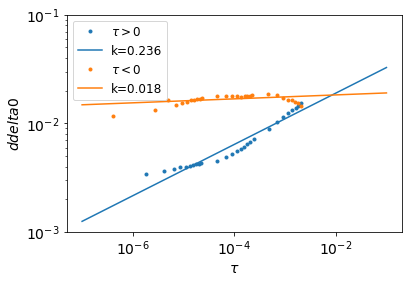

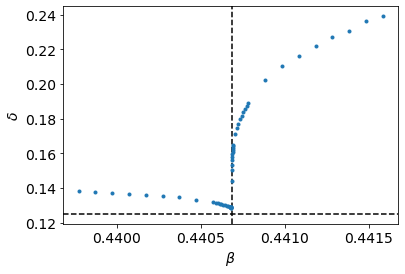


# High temperature
number of data points: 27
fitted parameters: [0.04328598 0.2124844 ]
fitted equation: A τ^k,A=4.33e-02,k=0.2125

# Low temperature
number of data points: 28
fitted parameters: [0.42177688 0.22046943]
fitted equation: A τ^k,A=4.22e-01,k=0.2205


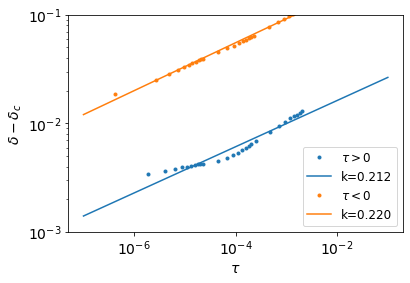

In [11]:
import importlib
importlib.reload(importlib.import_module('correlation_ansatzs'))
from correlation_ansatzs import critical_exponent,scale_dependent_delta,low_temp_correlation

data=pd.read_csv('./data/hotrg_gilt_X24_betas/fit_results.csv')
beta_critical=0.44068381958007813
delta_critical=0.125
data['tau']=(beta_critical-data['beta'])/data['beta']
data['ddelta']=data['delta']-delta_critical
data['corr1']=low_temp_correlation(x=1,A=data['A'],zeta=data['zeta'],delta=data['delta'],m0=data['m0'])
data['delta0']=scale_dependent_delta(x=1,A=data['A'],zeta=data['zeta'],delta=data['delta'],m0=data['m0'])
data['ddelta0']=data['delta0']-delta_critical
data['m0_error']=np.abs(data['m0_double']-data['m0'])

def latex(name):
    return {
    'beta':'\\beta',
    'tau':'\\tau',
    'm0':'m_0',
    'A':'A',
    'zeta':'\\zeta',
    'delta':'\\delta',
    'ddelta':'\\delta-\\delta_c',
    
    }.get(name,name)

def plot_data(data,xname,yname,yscale='linear',x_ref=None,y_ref=None):
    plt.rcParams.update({'font.size': 14,'legend.fontsize':12})
    plt.figure()
    if y_ref is not None:plt.axhline(y_ref,color='k',ls='--')
    if x_ref is not None:plt.axvline(x_ref,color='k',ls='--')
    plt.plot(data[xname],data[yname],'.',label='$'+latex(yname)+'$')
    plt.xlabel('$'+latex(xname)+'$');plt.ylabel('$'+latex(yname)+'$')
    plt.yscale(yscale)
    plt.show()



def plot_data_loglog(data,xname,yname,ylim=None):
    plt.rcParams.update({'font.size': 14,'legend.fontsize':12})
    plt.figure()
    x_fit=np.geomspace(1e-7,1e-1)

    print('\n# High temperature')
    mask=data[xname]>0
    x_abs,y_abs=np.abs(data[mask][xname]),np.abs(data[mask][yname])
    p,ansatz=fit_data(critical_exponent,x_abs,y_abs,use_loglog=True)
    plt.plot(x_abs,y_abs,'.',color='C0',label='$'+latex(xname)+'>0$')
    plt.plot(x_fit,ansatz(x_fit,*p),'-',color='C0',label='k={:.3f}'.format(p[1]))

    print('\n# Low temperature')
    mask=data[xname]<0
    x_abs,y_abs=np.abs(data[mask][xname]),np.abs(data[mask][yname])
    p,ansatz=fit_data(critical_exponent,x_abs,y_abs,use_loglog=True)
    plt.plot(x_abs,y_abs,'.',color='C1',label='$'+latex(xname)+'<0$')
    plt.plot(x_fit,ansatz(x_fit,*p),'-',color='C1',label='k={:.3f}'.format(p[1]))

    plt.xscale('log');plt.yscale('log')
    plt.xlabel('$'+latex(xname)+'$');plt.ylabel('$'+latex(yname)+'$')
    plt.ylim(ylim)
    plt.legend()
    plt.show()

# plot_data(data,'beta','A',x_ref=beta_critical)
# plot_data_loglog(data,'tau','A',ylim=(1e-1,1))
# plot_data(data,'beta','corr1',x_ref=beta_critical,y_ref=1)

plot_data(data,'beta','m0',x_ref=beta_critical)
plot_data(data,'beta','m0_double',x_ref=beta_critical)
plot_data(data,'beta','m0_error',x_ref=beta_critical,yscale='log')


plot_data(data,'beta','m0',x_ref=beta_critical)
plot_data_loglog(data,'tau','m0',ylim=(1e-1,1))

plot_data(data,'beta','zeta',yscale='log',x_ref=beta_critical)
plot_data_loglog(data,'tau','zeta',ylim=(1e2,1e6))

plot_data(data,'beta','delta0',x_ref=beta_critical,y_ref=delta_critical)
plot_data_loglog(data,'tau','ddelta0',ylim=(1e-3,.1))

plot_data(data,'beta','delta',x_ref=beta_critical,y_ref=delta_critical)
plot_data_loglog(data,'tau','ddelta',ylim=(1e-3,.1))


# display(data)

In [ ]:
display(data)